In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('expense_data_annual.csv', encoding = 'utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1560 non-null   object
 1   amount          1560 non-null   object
 2   category        1560 non-null   object
 3   description     1560 non-null   object
 4   payment_method  1560 non-null   object
 5   is_fixed        1560 non-null   bool  
 6   essential       1560 non-null   bool  
dtypes: bool(2), object(5)
memory usage: 64.1+ KB


In [4]:
'''date 컬럼'''
# date 타입 맞추기 (date, yyyy-mm-dd)
df['date'] = pd.to_datetime(df['date'], format='mixed')

df['date'].dtype
# month 컬럼 만들기 (str)
df['month'] = df['date'].dt.month

df['month']= df['month'].astype(str)

# year_month 컬럼 만들기 (strftime)

df['year_month'] = df['date'].dt.strftime('%Y-%M')

In [5]:
'''amount 컬럼'''
# amount 콤마 및 단위 지우기 
# + int로 변환
df['amount'] = df ['amount'].astype(str).str.replace(',','').replace('원','').astype(int)


In [6]:
'''Categoty 컬럼'''
# 공백이 들어가는 경우를 고려하여, 하나의 카테고리로 적용될수 있도록 공백을 제거한다.
df['category'] = df['category'].str.strip()


In [7]:
'''Description 컬럼'''
# Description은 결측치를 허용한다. fillna('-')
# Description은 한정되어 있진 않지만, 같은 내용이라면 공백의 영향을 받지 않고 집계될 수 있도록 strip을 적용한다.
df['description'] = df['description'].fillna('-')
df['description'] = df['description'].str.strip()

# 집계
- streamlit UI상에 표시될 집계수치

In [8]:
# sum_amount (int)
# 데이터 상 사용한 금액의 총합

sum_amount = df['amount'].sum()

print(f'금액의 총합 = {sum_amount}')

# avg_amount (int)
# 건당 사용한 금액의 평균
avg_amount = int(df['amount'].mean())

print(f'건당 평균 금액 = {avg_amount}')

# 가장 많은 돈을 지출한 카테고리
max_category = df.groupby('category')['amount'].sum().idxmax()

print(f'가장 많은 돈을 지출한 카테고리 = {max_category}')

# 가장 많은 돈을 지출한 항목  description
max_description = df.groupby('description')['amount'].sum().idxmax()

print(f'가장 많은 돈을 지출한 항목 = {max_description}')


# 비필수 지출 비율 (%) -> "낭비율"

waste_amount = df[df['essential'] == False]['amount'].sum() 

waste_rate = (waste_amount / sum_amount)* 100

print(f'비필수 지출 = {waste_amount}')
print(f'비필수 지출 비율 = {waste_rate}%')


금액의 총합 = 54288100
건당 평균 금액 = 34800
가장 많은 돈을 지출한 카테고리 = 쇼핑
가장 많은 돈을 지출한 항목 = 월세
비필수 지출 = 27015900
비필수 지출 비율 = 49.763944584540624%


# 차트용 수치
- streamlit UI 상에 나타날 차트를 생성하는 코드

In [9]:
import plotly.express as px

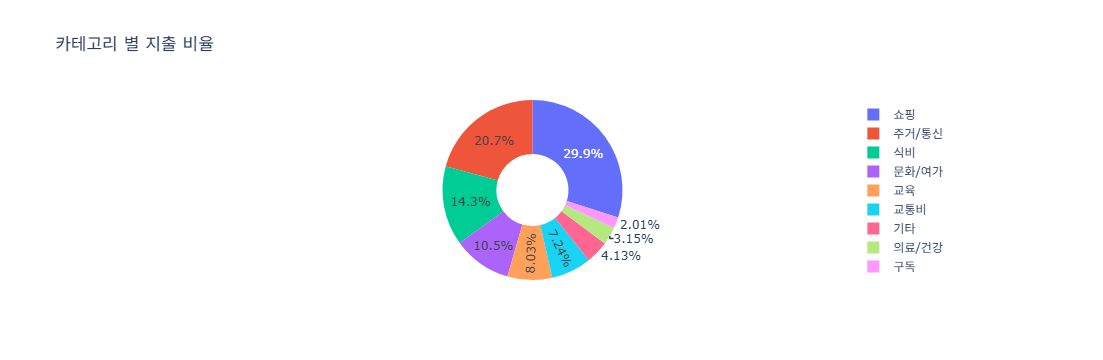

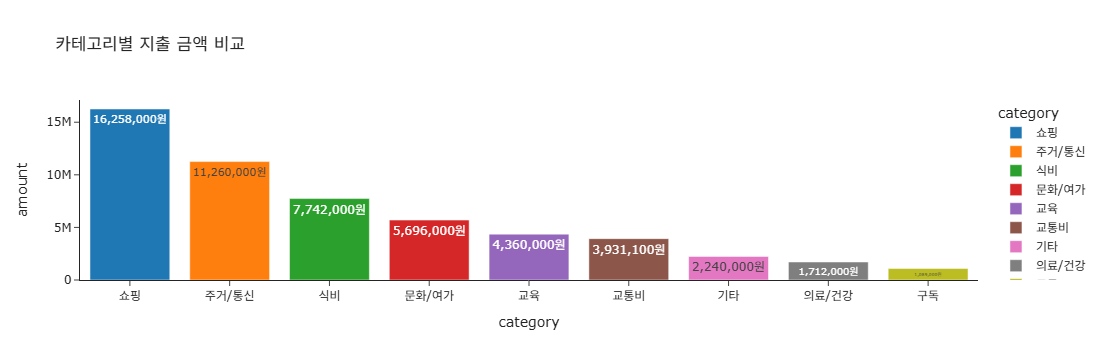

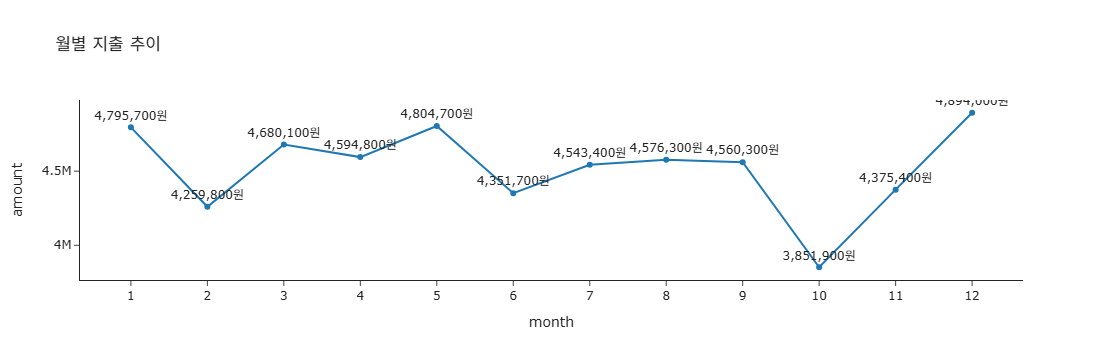

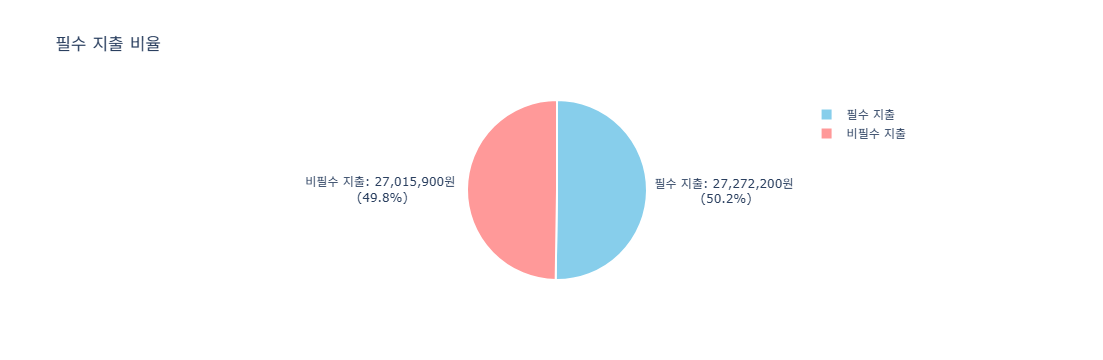

In [27]:
# sum_category
# 카테고리 별 사용 금액의 합

sum_category = df.groupby('category')['amount'].sum().reset_index()
sum_category = sum_category.sort_values(by='amount', ascending=False)

# 카테고리 별 지출 비율 (파이 차트)
fig_catpie = px.pie (sum_category,
                     names = 'category',
                     values = 'amount',
                     title = '카테고리 별 지출 비율',
                    hole = 0.4)
fig_catpie.show()
# 카테고리 별 지출 금액 비교 (바 차트)
fig_catbar = px.bar (sum_category,
                     x = 'category',
                     y = 'amount',
                     color = 'category',
                     text = 'amount',
                     title = '카테고리별 지출 금액 비교',
                     template = 'simple_white')

fig_catbar.update_traces(texttemplate = '%{text:,}원',
                        textposition = 'inside',
                        textangle = 0,
                        cliponaxis=False,)

fig_catbar.show()


# 월별 지출 추이 (라인 차트) 
sum_monthly = df.groupby('month')['amount'].sum().reset_index()
sum_monthly['month_int'] = sum_monthly['month'].str.replace('월', '').astype(int)
sum_monthly = sum_monthly.sort_values(by='month_int')

fig_monline = px.line (sum_monthly,
                         x = 'month',
                         y = 'amount',
                         text = 'amount',
                         markers = True,
                         template = 'simple_white',
                         title = '월별 지출 추이')

fig_monline.update_traces(texttemplate = '%{text:,}원',
                         textposition='top center')


fig_monline.show()


#### 추가 필요 ######
# 필수/ 선택 지출 비율 (파이 차트)
sum_essential = df.groupby('essential')['amount'].sum().reset_index()
sum_essential['essential'] = sum_essential['essential'].map({True: '필수 지출', False: '비필수 지출'})


fig_esspie = px.pie(sum_essential,
                    names = 'essential',
                    values = 'amount',
                    title = '필수 지출 비율',
                    color='essential',
                    color_discrete_map={'필수 지출': '#87CEEB', '비필수 지출': '#FF9999'})

fig_esspie.update_traces(texttemplate='%{label}: %{value:,}원 <br>(%{percent})',
                         textinfo='percent+label',
                         marker=dict(line=dict(color='#FFFFFF', width=2)),
                         textposition='outside')

fig_esspie.show()
# 카테고리 내부의 "필수 vs 선택" 비중(바 차트)
